In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
games = pd.read_csv('vgsales_seaborn.csv')
games = games.replace('tbd', np.nan)
games['User_Score'] = pd.to_numeric(games['User_Score'])
games = games[games['Year_of_Release'] < 2017.0]
games[games['Year_of_Release'].notnull()]
games.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

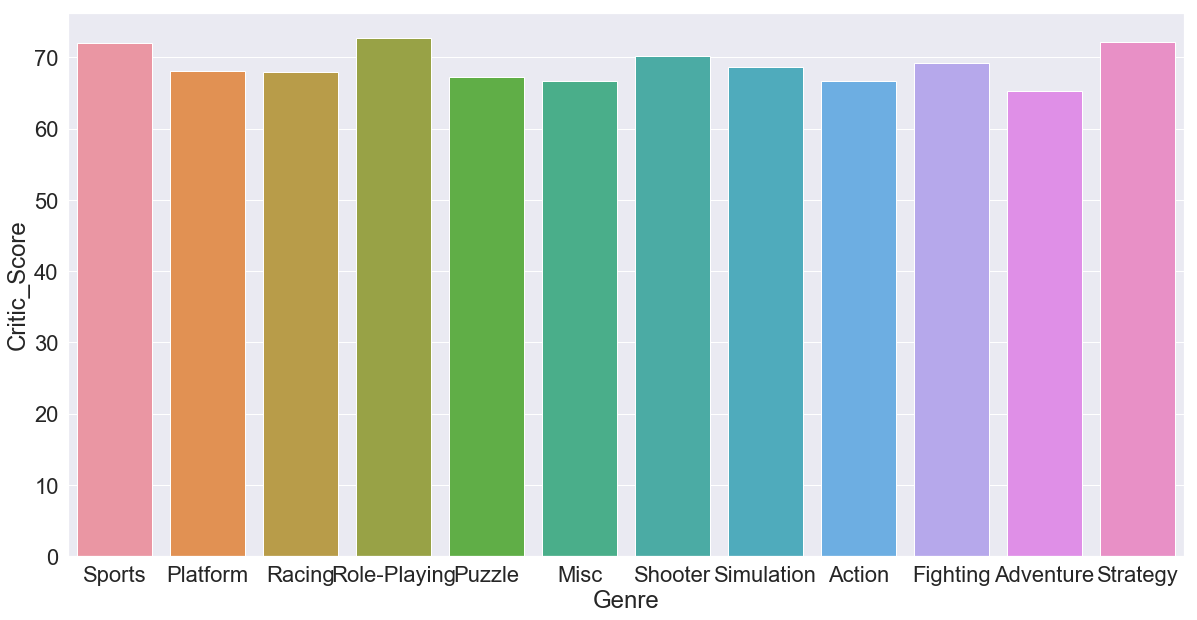

In [6]:
sns.set_style('whitegrid')
sns.set(font_scale = 2)
plt.subplots(figsize=(20,10))
example_one = sns.barplot(x='Genre', y='Critic_Score', data=games, ci=None)

Simple barplot of critical score broken down by genre.  It shows that scores all hover around the same place, but there is a lot of wasted space, especially at the bottom of the chart.

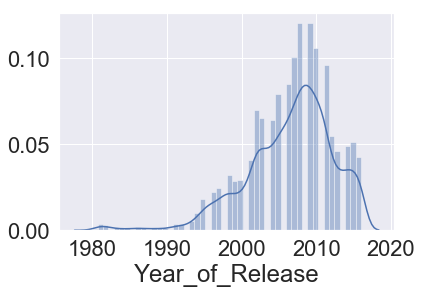

In [7]:
sns.set_style('darkgrid')
sns.set(font_scale = 2)
sns.distplot(games['Year_of_Release'])

Histogram of game releases with a trend line.  Shows the time period where the most games came out.  No real cons except for the poor labeling (my fault).

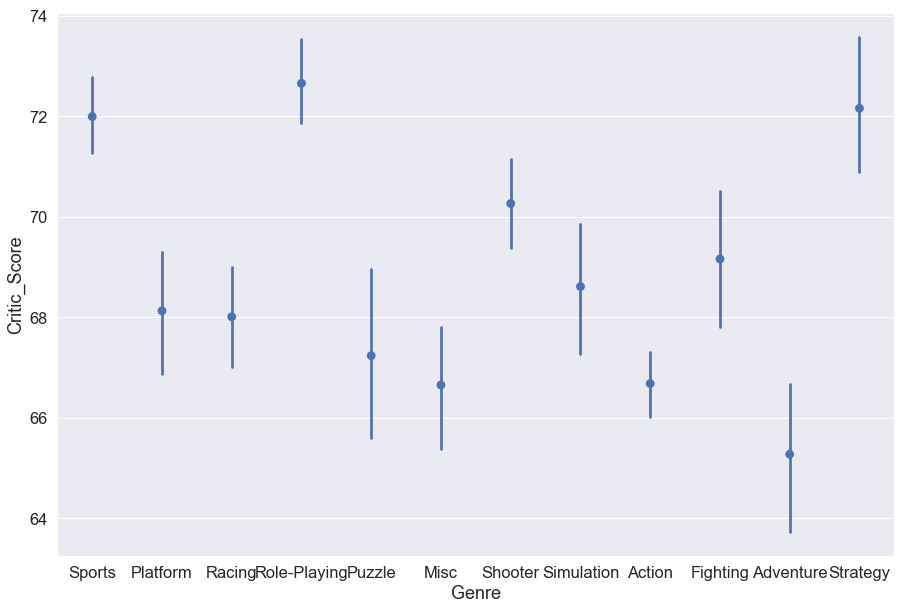

In [13]:
sns.set_style('dark')
sns.set(font_scale = 1.5)
plt.subplots(figsize=(15,10))
ex3 = sns.pointplot(x='Genre', y='Critic_Score', data=games, ci=95,
                    dodge=True, join=False)

Similar to the barplot above but tells a different story.  No wasted space this time, looks a lot cleaner and not as busy, highlights the differences in score better.  Might highlight them too much though.

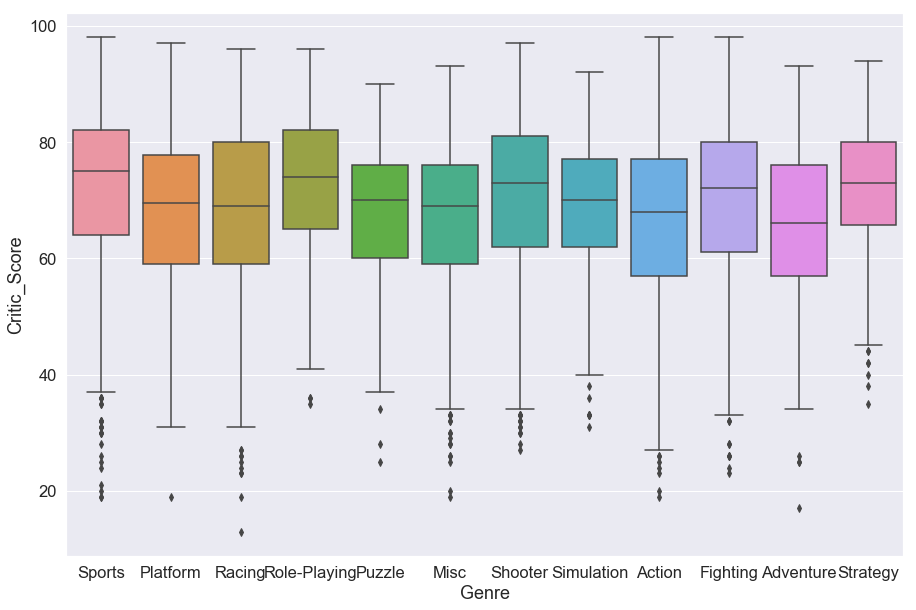

In [29]:
plt.subplots(figsize=(15,10))
box = sns.boxplot(x='Genre', y='Critic_Score', data=games)

Final score chart, this time a boxplot.  Shows new info, which is that all outliers for score occur below the mean for every genre.  There doesn't seem to be too much of a difference in scores across genre.

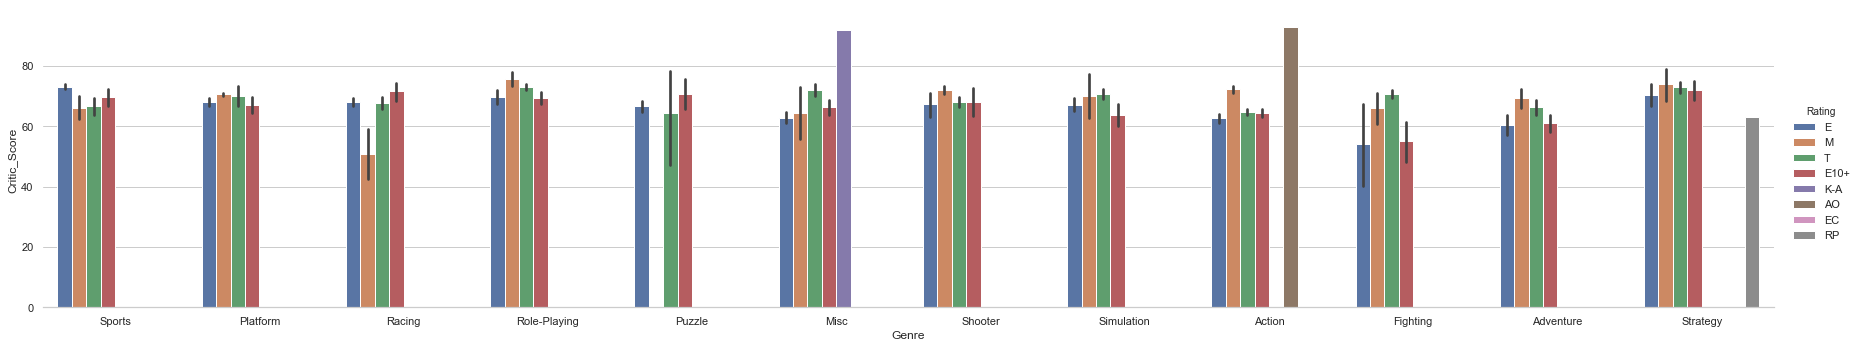

In [30]:
sns.set(style="whitegrid")
cat = sns.catplot(x="Genre", y="Critic_Score", hue='Rating', data=games,  
                  height=5, aspect=5, kind="bar")
cat.despine(left=True)

Similar to the barplot above, but this time with Rating added in as hue.  Information is broken down even more granularly.  Should have removed some of the ratings that are barely used ('AO' & 'RP' for example).

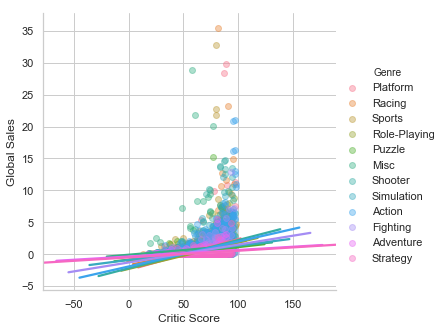

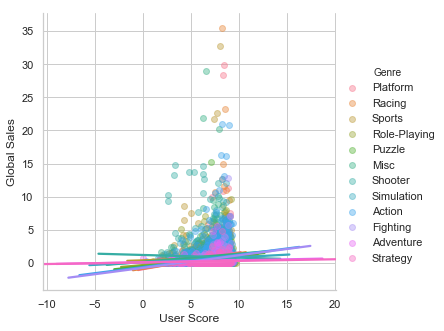

In [15]:
sns.set(style="whitegrid")
games_no_out = games[(games['Global_Sales'] <= 80.0)]

g1 = sns.lmplot(y='Global_Sales',
               x='Critic_Score',
                hue='Genre',
               data=games_no_out,
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g1.set_ylabels("Global Sales")
g1.set_xlabels("Critic Score")
plt.subplots_adjust(top=0.9)
plt.show()

g2 = sns.lmplot(y='Global_Sales',
               x='User_Score',
                hue='Genre',
               data=games_no_out,
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g2.set_ylabels("Global Sales")
g2.set_xlabels("User Score")
plt.subplots_adjust(top=0.9)
plt.show()

Scatterplot with lines of fit for critic/user score and global sales.  This chart is too busy, too many variables and different hues to plot.  Can't really tell which lines of fit are which. 

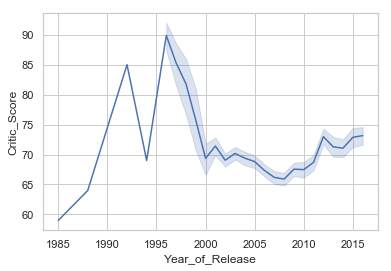

In [35]:
score = sns.lineplot(x='Year_of_Release', y='Critic_Score', ci=95, data=games)

Lineplot for critical score by year.  Not sure why the estimator starts when it does, need to investigate.

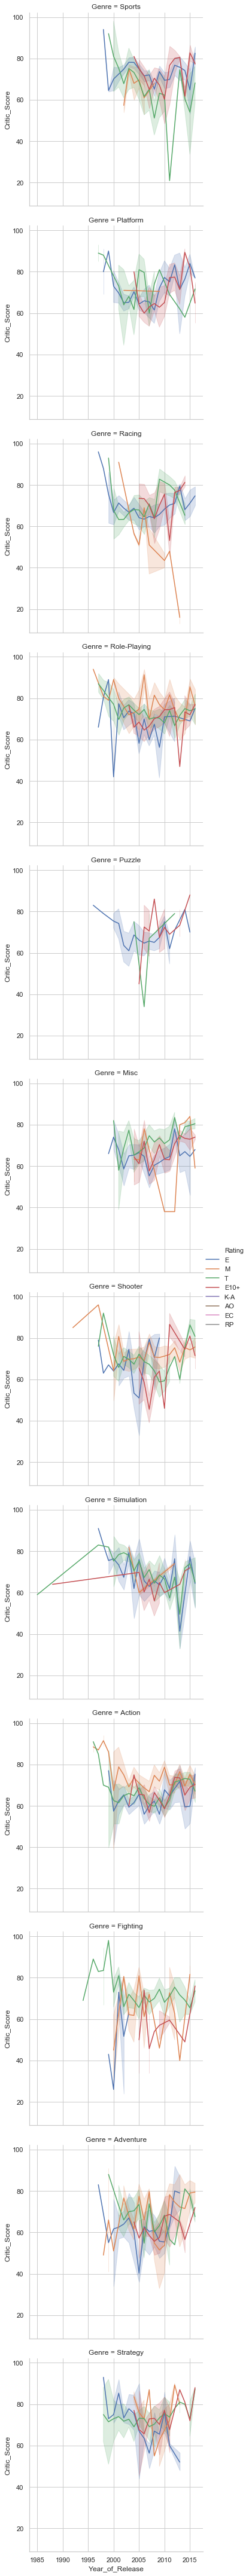

In [36]:
sns.relplot(x='Year_of_Release', y='Critic_Score', hue='Rating',
           kind='line', row='Genre', data=games)

Same as above but with different lines for ratings and broken out by genre.  Again, too busy, need to remove some lesser used ratings, estimator is all over the place.  Think this is the last time I use this dataset. GG